In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install csv
# !pip install matplotlib
# !pip install seaborn
# !pip install tqdm

In [ ]:
!pip install --upgrade pip

Imports

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from functools import total_ordering
import bisect
from heapq import merge
from collections import Counter
from tqdm import tqdm

Constants

In [5]:
filename = "Real Students Grades.csv"
NUM_STUD = 15000

Read Data

In [6]:
with open(filename, 'r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if needed
    next(csv_reader, None)
    # Iterate over each row in the CSV file
    sat = []
    bagrut = []
    for row in csv_reader:
        if row[0] and row[1] and float(row[1]) > 0:
            sat.append(float(row[0]))
            bagrut.append(float(row[1]))
sat = np.array(sat)
bagrut = np.array(bagrut)

In [7]:
sat_normalized = (sat - np.min(sat)) / (np.max(sat) - np.min(sat))
bagrut_normalized = (bagrut - np.min(bagrut)) / (np.max(bagrut) - np.min(bagrut))

Visualize the initial data distribution

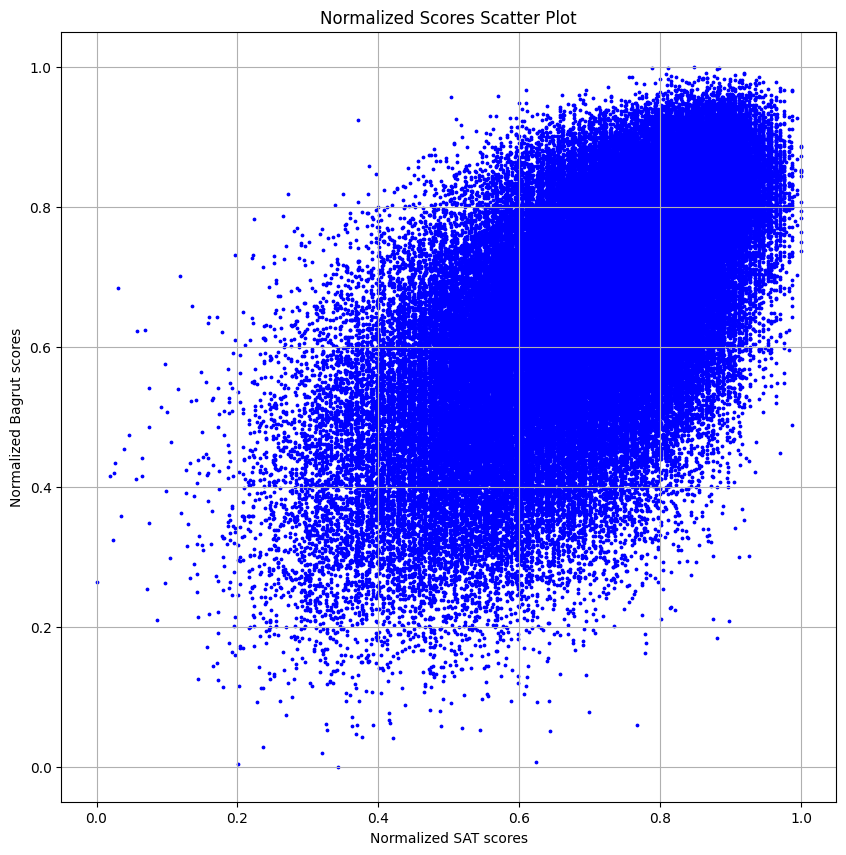

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(sat_normalized, bagrut_normalized, color='blue', s=3)
plt.xlabel('Normalized SAT scores')
plt.ylabel('Normalized Bagrut scores')
plt.title('Normalized Scores Scatter Plot')
plt.grid(True)
plt.show()

In [9]:
print(np.shape(sat)) # number os students

(136939,)


Choosing subset of the samples for analyzing for complexity reduction

In [10]:
indices = np.random.choice(len(sat_normalized), NUM_STUD, replace=False) #randomly choose 15K students
students = np.stack((sat_normalized[indices], bagrut_normalized[indices]), axis=1)
print(np.shape(students))
students = pd.DataFrame(students)
students

(15000, 2)


,0,1
0,0.734155,0.801997
1,0.737676,0.688649
2,0.297535,0.456722
3,0.677817,0.845434
4,0.695423,0.751585
...,...,...
14995,0.639085,0.626347
14996,0.547535,0.792961
14997,0.563380,0.639981
14998,0.538732,0.625872


Random Sort algorithm function

In [11]:
def random_sort(df, interactions, num_colors=10):
    nparr = np.array(df)
    n = len(nparr)
    for _ in tqdm(range(interactions)):
        i = np.random.randint(0, n-1)
        if not((nparr[i,0] < nparr[i+1,0]) and (nparr[i,1] < nparr[i+1,1])):
            nparr[i+1], nparr[i] = nparr[i].copy(), nparr[i+1].copy()
    df_sorted = pd.DataFrame(nparr, columns = ['SAT','Bagrut','color'])
    df_sorted['color'] = np.array([[i]*int(n/num_colors) for i in range(num_colors)]).flatten()           
    return df_sorted  

Analyzing algorithm performance basaed on number of cycles

100%|██████████| 15000/15000 [00:00<00:00, 25111.60it/s]


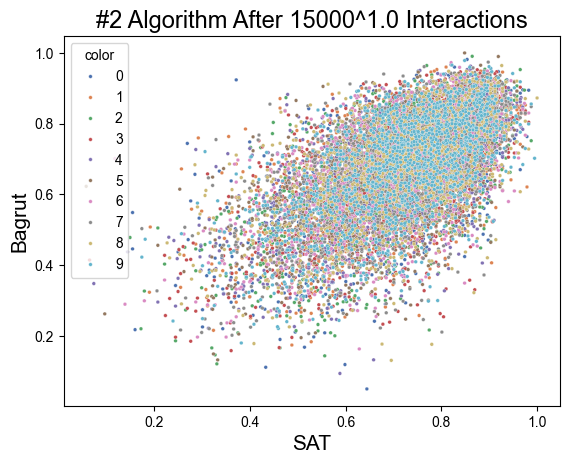

100%|██████████| 164646/164646 [00:05<00:00, 31710.36it/s]


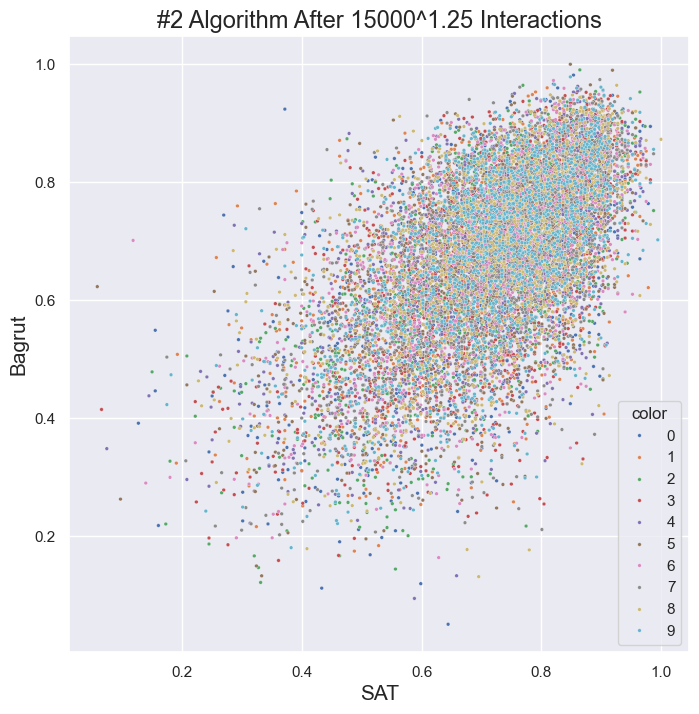

100%|██████████| 1822117/1822117 [00:57<00:00, 31450.05it/s]


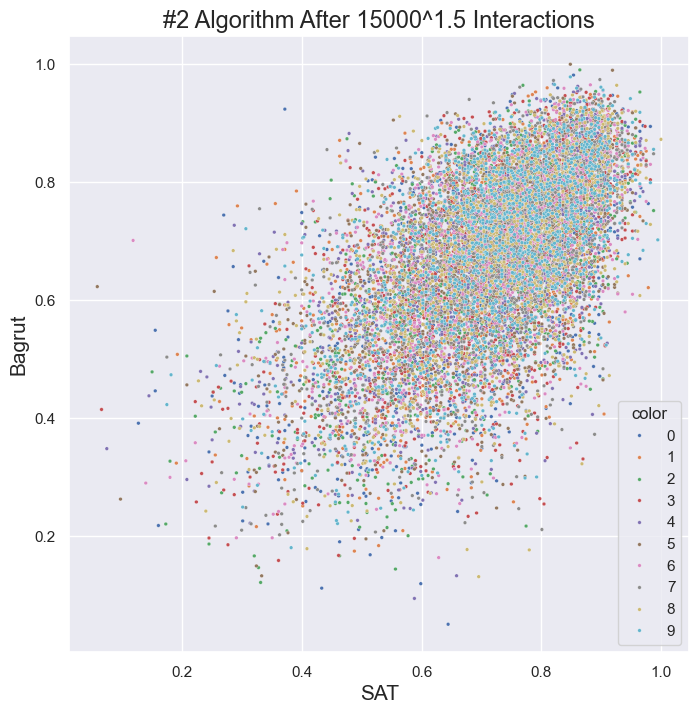

 27%|██▋       | 5511022/20165042 [02:58<07:54, 30879.50it/s] 


KeyboardInterrupt: 

In [12]:
cycles = [i/100.0 for i in range(100, 360, 25)]

for cycle in cycles:
    students_df_sort = students.copy()
    students_df_sort['color'] = [0] * students_df_sort.shape[0]
    if cycle == 1:
        interactions = int(pow(NUM_STUD, cycle))
    else:
        interactions = int(pow(NUM_STUD, cycle) - pow(NUM_STUD, cycle - 0.5))
    students_df_sort = random_sort(students_df_sort, interactions)

    sns.scatterplot(data=students_df_sort, x="SAT", y="Bagrut", hue="color", palette='deep', markers=True, s=7)
    sns.set(rc={'figure.figsize': (8, 8)})
    plt.title('#2 Algorithm After {}^{} Interactions'.format(NUM_STUD, cycle), size=17)
    plt.ylabel('Bagrut', size=15)
    plt.xlabel('SAT', size=15)
    plt.savefig('ScatterRealStudentsin{}.png'.format(cycle))
    plt.show()